## Write apriori algorithm from scratch in python and demonstrate it in colab

In [ ]:
import pandas as pd
import itertools

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DataMining/assignmnet7/DataSet/GroceryStoreDataSet.csv')
data

,0,1,2,3
0,MILK,BREAD,BISCUIT,NaN
1,BREAD,MILK,BISCUIT,CORNFLAKES
2,BREAD,TEA,BOURNVITA,NaN
3,JAM,MAGGI,BREAD,MILK
4,MAGGI,TEA,BISCUIT,NaN
5,BREAD,TEA,BOURNVITA,NaN
6,MAGGI,TEA,CORNFLAKES,NaN
7,MAGGI,BREAD,TEA,BISCUIT
8,JAM,MAGGI,BREAD,TEA
9,BREAD,MILK,NaN,NaN


In [ ]:
minimum_support_count = 2
records = []
for i in range(0, 20):
    records.append([str(data.values[i,j]) for j in range(0, 4)])

In [ ]:
items = sorted([item for sublist in records for item in sublist if item != 'nan'])

In [ ]:
def stage_1(items, minimum_support_count):
    c1 = {i:items.count(i) for i in items}
    l1 = {}
    for key, value in c1.items():
        if value >= minimum_support_count:
           l1[key] = value 
    
    return c1, l1
c1, l1 = stage_1(items, minimum_support_count)

In [ ]:
def stage_2(l1, records, minimum_support_count):
    l1 = sorted(list(l1.keys()))
    L1 = list(itertools.combinations(l1, 2))
    c2 = {}
    l2 = {}
    for iter1 in L1:
        count = 0
        for iter2 in records:
            if sublist(iter1, iter2):
                count+=1
        c2[iter1] = count
    for key, value in c2.items():
        if value >= minimum_support_count:
            if check_subset_frequency(key, l1, 1):
                l2[key] = value 
    
    return c2, l2
c2, l2 = stage_2(l1, records, minimum_support_count)

In [ ]:
def check_subset_frequency(itemset, l, n):
    if n>1:    
        subsets = list(itertools.combinations(itemset, n))
    else:
        subsets = itemset
    for iter1 in subsets:
        if not iter1 in l:
            return False
    return True

In [ ]:
def stage_3(l2, records, minimum_support_count):
    l2 = list(l2.keys())
    L2 = sorted(list(set([item for t in l2 for item in t])))
    L2 = list(itertools.combinations(L2, 3))
    c3 = {}
    l3 = {}
    for iter1 in L2:
        count = 0
        for iter2 in records:
            if sublist(iter1, iter2):
                count+=1
        c3[iter1] = count
    for key, value in c3.items():
        if value >= minimum_support_count:
            if check_subset_frequency(key, l2, 2):
                l3[key] = value 
        
    return c3, l3
c3, l3 = stage_3(l2, records, minimum_support_count)

In [ ]:
itemlist = {**l1, **l2, **l3, **l4}

In [ ]:
def stage_4(l3, records, minimum_support_count):
    l3 = list(l3.keys())
    L3 = sorted(list(set([item for t in l3 for item in t])))
    L3 = list(itertools.combinations(L3, 4))
    c4 = {}
    l4 = {}
    for iter1 in L3:
        count = 0
        for iter2 in records:
            if sublist(iter1, iter2):
                count+=1
        c4[iter1] = count
    for key, value in c4.items():
        if value >= minimum_support_count:
            if check_subset_frequency(key, l3, 3):
                l4[key] = value 
        
    return c4, l4
c4, l4 = stage_4(l3, records, minimum_support_count)

In [ ]:
sets = []
for iter1 in list(l3.keys()):
    subsets = list(itertools.combinations(iter1, 2))
    sets.append(subsets)

In [ ]:
def support_count(itemset, itemlist):
    return itemlist[itemset]
list_l3 = list(l3.keys())
for i in range(0, len(list_l3)):
  for iter1 in sets[i]:
      a = iter1
      b = set(list_l3[i]) - set(iter1)
      confidence = (support_count(list_l3[i], itemlist)/support_count(iter1, itemlist))*100
      print("Confidence{}->{} = ".format(a,b), confidence)

Confidence('BISCUIT', 'BREAD')->{'MILK'} =  50.0
Confidence('BISCUIT', 'MILK')->{'BREAD'} =  100.0
Confidence('BREAD', 'MILK')->{'BISCUIT'} =  50.0
Confidence('BISCUIT', 'COCK')->{'COFFEE'} =  100.0
Confidence('BISCUIT', 'COFFEE')->{'COCK'} =  100.0
Confidence('COCK', 'COFFEE')->{'BISCUIT'} =  66.66666666666666
Confidence('BISCUIT', 'COCK')->{'CORNFLAKES'} =  100.0
Confidence('BISCUIT', 'CORNFLAKES')->{'COCK'} =  66.66666666666666
Confidence('COCK', 'CORNFLAKES')->{'BISCUIT'} =  100.0
Confidence('BISCUIT', 'COFFEE')->{'CORNFLAKES'} =  100.0
Confidence('BISCUIT', 'CORNFLAKES')->{'COFFEE'} =  66.66666666666666
Confidence('COFFEE', 'CORNFLAKES')->{'BISCUIT'} =  50.0
Confidence('BISCUIT', 'MAGGI')->{'TEA'} =  100.0
Confidence('BISCUIT', 'TEA')->{'MAGGI'} =  100.0
Confidence('MAGGI', 'TEA')->{'BISCUIT'} =  50.0
Confidence('BOURNVITA', 'BREAD')->{'TEA'} =  66.66666666666666
Confidence('BOURNVITA', 'TEA')->{'BREAD'} =  100.0
Confidence('BREAD', 'TEA')->{'BOURNVITA'} =  50.0
Confidence('BREAD'

## Write classic GBM method from scratch in python and demonstrate in colab

In [ ]:
import typing
import numpy as np

def GradBoost(model,
              X_test: np.array,                  # testing independent variables
              X_train: np.array,                 # training independent variables
              y_train: np.array,                 # training dependent variable
              boosting_rounds: int = 100,        # number of boosting rounds
              learning_rate: float = 0.1,        # learning rate with default of 0.1
              verbose: bool = True) -> np.array: # if True, shows a tqdm progress bar
    '''
    Takes in a model and performs gradient boosting using that model. This allows for almost any scikit-learn
    model to be used.
    '''
    import numpy as np
    
    # make a first guess of our training target variable using the mean
    y_hat_train = np.repeat(np.mean(y_train), len(y_train))
    # initialize the out of sample prediction with the mean of the training target variable
    y_hat_train_test = np.repeat(np.mean(y_train), len(X_test))
    # calculate the residuals from the training data using the first guess
    pseudo_resids = y_train - y_hat_train
    
    # performs gradient boosting with a tqdm progress bar
    if verbose:
        from tqdm import tqdm
        # iterates through the boosting round
        for _ in tqdm(range(0, boosting_rounds)):
            # fit the model to the pseudo residuals
            model = model.fit(X_train, pseudo_resids)   
            # increment the predicted training y with the pseudo residual * learning rate
            y_hat_train += learning_rate * model.predict(X_train)       
            # increment the predicted test y as well
            y_hat_train_test += learning_rate * model.predict(X_test)
            # calculate the pseudo resids for next round
            pseudo_resids = y_train - y_hat_train 
    # performs gradient boosting without a progress bar        
    else:
        # iterates through the boosting round
        for _ in range(0, boosting_rounds):
            # fit the model to the pseudo residuals
            model = model.fit(X_train, pseudo_resids)   
            # increment the predicted training y with the pseudo residual * learning rate
            y_hat_train += learning_rate * model.predict(X_train)       
            # increment the predicted test y as well
            y_hat_train_test += learning_rate * model.predict(X_test)
            # calculate the pseudo resids for next round
            pseudo_resids = y_train - y_hat_train  

    # return a tuple of the predicted training y and the predicted test y
    return y_hat_train, y_hat_train_test


In [ ]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=1000, 
                       n_features=20, 
                       n_informative=15, 
                       n_targets=1, 
                       bias=0.0, 
                       noise=20,
                       shuffle=True,
                       random_state=13)

X_train = X[0:int(len(X) / 2)]
y_train = y[0:int(len(X) / 2)]

X_test = X[int(len(X) / 2):]
y_test = y[int(len(X) / 2):]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import RidgeCV

tree_model = DecisionTreeRegressor(criterion='mse',
                                   max_depth=3)
ridge_model = RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0), 
                      fit_intercept=True, 
                      normalize=True,
                      cv=3)
###
# Plot the training mean squared error vs. number of boosting rounds by looping through various
# numbers of boosting rounds, calculating the training mean squared error each round and 
# appending it to a list.
###
from tqdm import tqdm_notebook as tqdm
tree_mse_train = []
n_rounds = np.arange(5, 101, 5)
for n_round in tqdm(n_rounds):
    y_hat_train = GradBoost(tree_model,
                            X_test,
                            X_train,   
                            y_train,  
                            boosting_rounds=n_round,  
                            learning_rate=0.1,
                            verbose=False)[0]
    
    tree_mse_train.append(np.mean((y_train - y_hat_train) ** 2))


ridge_mse_train = []
for n_round in tqdm(n_rounds):
    y_hat_train = GradBoost(ridge_model,
                            X_test,
                            X_train,   
                            y_train,  
                            boosting_rounds=n_round,  
                            learning_rate=0.1,
                            verbose=False)[0]
    
    ridge_mse_train.append(np.mean((y_train - y_hat_train) ** 2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/20 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: 

  0%|          | 0/20 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the d

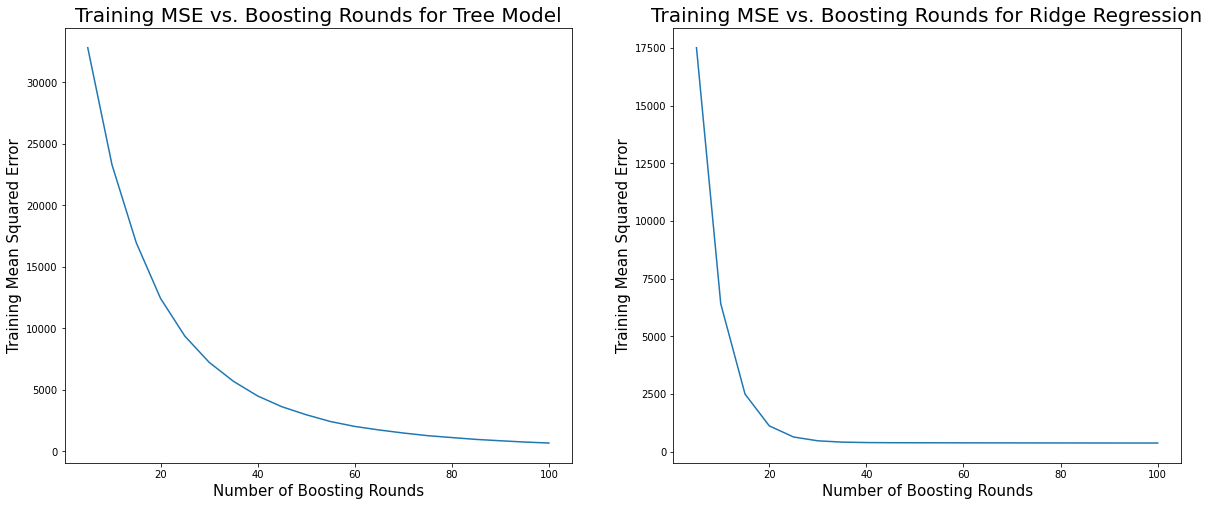

In [ ]:
# sets the plot size to 20x8
plt.rcParams['figure.figsize'] = (20,8)

plt.subplot(1, 2, 1)
plt.plot(n_rounds, tree_mse_train)
plt.title('Training MSE vs. Boosting Rounds for Tree Model', fontsize=20)
plt.xlabel('Number of Boosting Rounds', fontsize=15)
plt.ylabel('Training Mean Squared Error', fontsize=15)
plt.show;

# sets the plot size to 20x8
plt.rcParams['figure.figsize'] = (20,8)

plt.subplot(1, 2, 2)
plt.plot(n_rounds, ridge_mse_train)
plt.title('Training MSE vs. Boosting Rounds for Ridge Regression', fontsize=20)
plt.xlabel('Number of Boosting Rounds', fontsize=15)
plt.ylabel('Training Mean Squared Error', fontsize=15)
plt.show;

## Write fpgrowth algorithm from scratch in python and demonstrate it in colab



In [ ]:
import time

#Function to load file and return lists of Transactions
def Load_data(filename):
    with open(filename) as f:
        content = f.readlines()

    content = [x.strip() for x in content]
    Transaction = []

    for i in range(0, len(content)):
        Transaction.append(content[i].split())

    return Transaction

#To convert initial transaction into frozenset
def create_initialset(dataset):
    retDict = {}
    for trans in dataset:
        retDict[frozenset(trans)] = 1
    return retDict

#class of FP TREE node
class TreeNode:
    def __init__(self, Node_name,counter,parentNode):
        self.name = Node_name
        self.count = counter
        self.nodeLink = None
        self.parent = parentNode
        self.children = {}
        
    def increment_counter(self, counter):
        self.count += counter

#To create Headertable and ordered itemsets for FP Tree
def create_FPTree(dataset, minSupport):
    HeaderTable = {}
    for transaction in dataset:
        for item in transaction:
            HeaderTable[item] = HeaderTable.get(item,0) + dataset[transaction]
    for k in list(HeaderTable):
        if HeaderTable[k] < minSupport:
            del(HeaderTable[k])

    frequent_itemset = set(HeaderTable.keys())

    if len(frequent_itemset) == 0:
        return None, None

    for k in HeaderTable:
        HeaderTable[k] = [HeaderTable[k], None]

    retTree = TreeNode('Null Set',1,None)
    for itemset,count in dataset.items():
        frequent_transaction = {}
        for item in itemset:
            if item in frequent_itemset:
                frequent_transaction[item] = HeaderTable[item][0]
        if len(frequent_transaction) > 0:
            #to get ordered itemsets form transactions
            ordered_itemset = [v[0] for v in sorted(frequent_transaction.items(), key=lambda p: p[1], reverse=True)]
            #to update the FPTree
            updateTree(ordered_itemset, retTree, HeaderTable, count)
    return retTree, HeaderTable

#To create the FP Tree using ordered itemsets
def updateTree(itemset, FPTree, HeaderTable, count):
    if itemset[0] in FPTree.children:
        FPTree.children[itemset[0]].increment_counter(count)
    else:
        FPTree.children[itemset[0]] = TreeNode(itemset[0], count, FPTree)

        if HeaderTable[itemset[0]][1] == None:
            HeaderTable[itemset[0]][1] = FPTree.children[itemset[0]]
        else:
            update_NodeLink(HeaderTable[itemset[0]][1], FPTree.children[itemset[0]])

    if len(itemset) > 1:
        updateTree(itemset[1::], FPTree.children[itemset[0]], HeaderTable, count)

#To update the link of node in FP Tree
def update_NodeLink(Test_Node, Target_Node):
    while (Test_Node.nodeLink != None):
        Test_Node = Test_Node.nodeLink

    Test_Node.nodeLink = Target_Node

#To transverse FPTree in upward direction
def FPTree_uptransveral(leaf_Node, prefixPath):
 if leaf_Node.parent != None:
    prefixPath.append(leaf_Node.name)
    FPTree_uptransveral(leaf_Node.parent, prefixPath)

#To find conditional Pattern Bases
def find_prefix_path(basePat, TreeNode):
 Conditional_patterns_base = {}

 while TreeNode != None:
    prefixPath = []
    FPTree_uptransveral(TreeNode, prefixPath)
    if len(prefixPath) > 1:
        Conditional_patterns_base[frozenset(prefixPath[1:])] = TreeNode.count
    TreeNode = TreeNode.nodeLink

 return Conditional_patterns_base

#function to mine recursively conditional patterns base and conditional FP tree
def Mine_Tree(FPTree, HeaderTable, minSupport, prefix, frequent_itemset):
    bigL = [v[0] for v in sorted(HeaderTable.items(),key=lambda p: p[1][0])]
    for basePat in bigL:
        new_frequentset = prefix.copy()
        new_frequentset.add(basePat)
        #add frequent itemset to final list of frequent itemsets
        frequent_itemset.append(new_frequentset)
        #get all conditional pattern bases for item or itemsets
        Conditional_pattern_bases = find_prefix_path(basePat, HeaderTable[basePat][1])
        #call FP Tree construction to make conditional FP Tree
        Conditional_FPTree, Conditional_header = create_FPTree(Conditional_pattern_bases,minSupport)

        if Conditional_header != None:
            Mine_Tree(Conditional_FPTree, Conditional_header, minSupport, new_frequentset, frequent_itemset)

#to take input of filename and minimum support
print("Enter the filename:")
filename = input()
print("Enter the minimum support count:")
min_Support = int(input())

initSet = create_initialset(Load_data(filename))
start = time.time()
FPtree, HeaderTable = create_FPTree(initSet, min_Support)

frequent_itemset = []
#call function to mine all ferquent itemsets
Mine_Tree(FPtree, HeaderTable, min_Support, set([]), frequent_itemset)
end = time.time()

print("Time Taken is:")
print(end-start)
print("All frequent itemsets:")
print(frequent_itemset)

Enter the filename:
exe.txt
Enter the minimum support count:
3
Time Taken is:
0.00023865699768066406
All frequent itemsets:
[{'3'}, {'3', '2'}, {'1', '3'}, {'1'}, {'1', '2'}, {'2'}]


## Write kmeans from scratch and demonstrate it in colab

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataMining/assignmnet7/DataSet/train.csv')

In [ ]:
cluster_data = df[['Fare','Age']].copy(deep=True)
cluster_data.dropna(axis=0, inplace=True)
cluster_data.sort_values(by=['Fare','Age'], inplace=True)
cluster_array = np.array(cluster_data)

In [ ]:
print(cluster_array[0:10])

[[ 0.     19.    ]
 [ 0.     25.    ]
 [ 0.     36.    ]
 [ 0.     38.    ]
 [ 0.     39.    ]
 [ 0.     40.    ]
 [ 0.     49.    ]
 [ 4.0125 20.    ]
 [ 5.     33.    ]
 [ 6.2375 61.    ]]


In [ ]:
# Calculate Euclidean distance between two observations
def calc_distance(X1, X2):
    return (sum((X1 - X2)**2))**0.5

In [ ]:
# Assign cluster clusters based on closest centroid
def assign_clusters(centroids, cluster_array):
    clusters = []
    for i in range(cluster_array.shape[0]):
        distances = []
        for centroid in centroids:
            distances.append(calc_distance(centroid, 
                                           cluster_array[i]))
        cluster = [z for z, val in enumerate(distances) if val==min(distances)]
        clusters.append(cluster[0])
    return clusters

In [ ]:
# Calculate new centroids based on each cluster's mean
def calc_centroids(clusters, cluster_array):
    new_centroids = []
    cluster_df = pd.concat([pd.DataFrame(cluster_array),
                            pd.DataFrame(clusters, 
                                         columns=['cluster'])], 
                           axis=1)
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster']\
                                     ==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

In [ ]:
# Calculate variance within each cluster
def calc_centroid_variance(clusters, cluster_array):
    sum_squares = []
    cluster_df = pd.concat([pd.DataFrame(cluster_array),
                            pd.DataFrame(clusters, 
                                         columns=['cluster'])], 
                           axis=1)
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster']\
                                     ==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        mean_repmat = np.matlib.repmat(cluster_mean, 
                                       current_cluster.shape[0],1)
        sum_squares.append(np.sum(np.sum((current_cluster - mean_repmat)**2)))
    return sum_squares

In [ ]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt
import seaborn as sns
k = 4
cluster_vars = []

centroids = [cluster_array[i+2] for i in range(k)]
clusters = assign_clusters(centroids, cluster_array)
initial_clusters = clusters
print(0, round(np.mean(calc_centroid_variance(clusters, cluster_array))))

for i in range(20):
    centroids = calc_centroids(clusters, cluster_array)
    clusters = assign_clusters(centroids, cluster_array)
    cluster_var = np.mean(calc_centroid_variance(clusters, 
                                                 cluster_array))
    cluster_vars.append(cluster_var)
    print(i+1, round(cluster_var))

0 507874
1 259347
2 229172
3 182890
4 145160
5 128549
6 120822
7 111083
8 108858
9 108504
10 108219
11 107999
12 107851
13 107678
14 107171
15 106905
16 106818
17 106803
18 106799
19 106798
20 106796


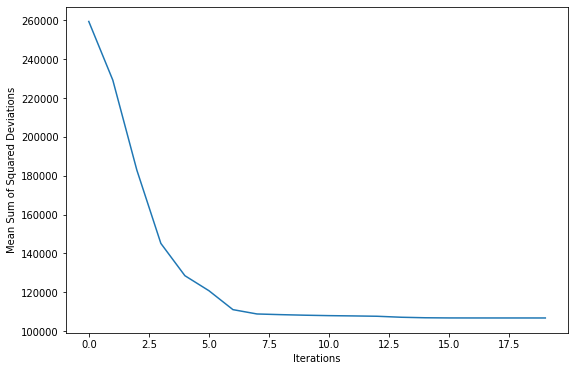

In [ ]:
plt.subplots(figsize=(9,6))
plt.plot(cluster_vars)
plt.xlabel('Iterations')
plt.ylabel('Mean Sum of Squared Deviations');
plt.savefig('mean_ssd', bpi=150)

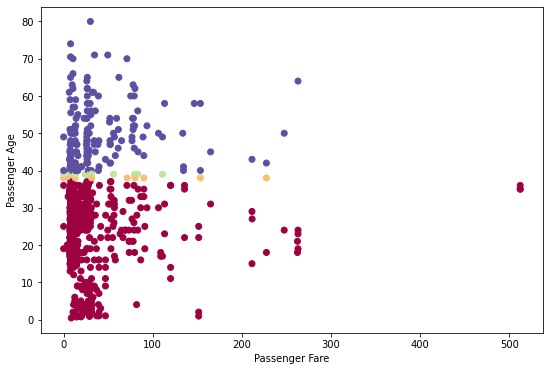

In [ ]:
plt.subplots(figsize=(9,6))
plt.scatter(x=cluster_array[:,0], y=cluster_array[:,1], 
            c=initial_clusters, cmap=plt.cm.Spectral);
plt.xlabel('Passenger Fare')
plt.ylabel('Passenger Age');
plt.savefig('initial_clusters', bpi=150)

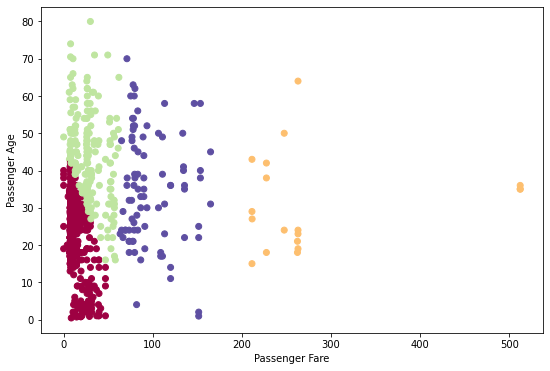

In [ ]:
plt.subplots(figsize=(9,6))
plt.scatter(x=cluster_array[:,0], y=cluster_array[:,1], 
            c=clusters, cmap=plt.cm.Spectral);
plt.xlabel('Passenger Fare')
plt.ylabel('Passenger Age');
plt.savefig('final_clusters', bpi=150)

## Write decision trees and random forest from scratch and demonstrate it in colab

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from math import log2

In [ ]:
iris = datasets.load_iris()


In [ ]:
df = pd.DataFrame(iris.data)
df.columns = ["sl", "sw", 'pl', 'pw']

In [ ]:
#Function to find label for a value
#if MIN_Value <=val < (m + Mean_Value) / 2 then it is assigned label a
#if (m + Mean_Value) <=val < Mean_Value then it is assigned label b
#if (Mean_Value) <=val < (Mean_Value + MAX_Value)/2 then it is assigned label c
#if (Mean_Value + MAX_Value)/2 <=val <= MAX_Value  then it is assigned label d

def label(val, *boundaries):
    if (val < boundaries[0]):
        return 'a'
    elif (val < boundaries[1]):
        return 'b'
    elif (val < boundaries[2]):
        return 'c'
    else:
        return 'd'

#Function to convert a continuous data into labelled data
#There are 4 lables  - a, b, c, d
def toLabel(df, old_feature_name):
    second = df[old_feature_name].mean()
    minimum = df[old_feature_name].min()
    first = (minimum + second)/2
    maximum = df[old_feature_name].max()
    third = (maximum + second)/2
    return df[old_feature_name].apply(label, args= (first, second, third))

In [ ]:
#Convert all columns to labelled data
df['sl_labeled'] = toLabel(df, 'sl')
df['sw_labeled'] = toLabel(df, 'sw')
df['pl_labeled'] = toLabel(df, 'pl')
df['pw_labeled'] = toLabel(df, 'pw')
df

,sl,sw,pl,pw,sl_labeled,sw_labeled,pl_labeled,pw_labeled
0,5.1,3.5,1.4,0.2,b,c,a,a
1,4.9,3.0,1.4,0.2,a,b,a,a
2,4.7,3.2,1.3,0.2,a,c,a,a
3,4.6,3.1,1.5,0.2,a,c,a,a
4,5.0,3.6,1.4,0.2,a,c,a,a
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,c,b,c,d
146,6.3,2.5,5.0,1.9,c,a,c,d
147,6.5,3.0,5.2,2.0,c,b,c,d
148,6.2,3.4,5.4,2.3,c,c,d,d


In [ ]:
df.drop(['sl', 'sw', 'pl', 'pw'], axis = 1, inplace = True)


In [ ]:
df.columns=['sapleLength','sapleWidth','petalLength','petalWidth']


In [ ]:
df.head(10)


,sapleLength,sapleWidth,petalLength,petalWidth
0,b,c,a,a
1,a,b,a,a
2,a,c,a,a
3,a,c,a,a
4,a,c,a,a
5,b,d,a,a
6,a,c,a,a
7,a,c,a,a
8,a,b,a,a
9,a,c,a,a


In [ ]:
y=iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
def entropy(y):
    
# Total entries
    total=len(y)
    
# Set of distinct values(classes)
    classes=set(y)
    
# Entropy calculation
    classCount=0
    entropy=0.0
    for i in classes:
        classCount=len(y[y==i])
        entropy+=-(classCount/total)*log2(classCount/total)
        
# Entropy of the Current Node    
    return entropy

In [ ]:
def gainRatio(df,y,selectedFeature):
    
# initial entropy
    initial_entropy=entropy(y)

# calculating entropy and split info after splitting
    total=df.count()[0]
    final_entropy=0
    split_info=0
    classes=set(df[selectedFeature])
    for i in classes:
        classCount=len(df[df[selectedFeature]==i])
        new_df=df[df[selectedFeature]==i]
        final_entropy+=(classCount/total)*entropy(new_df['target'])
        split_info-=(classCount/total)*log2(classCount/total)
        
    
# information gain
    info_gain=initial_entropy-final_entropy
    gain_ratio=info_gain/split_info
    
    return gain_ratio

In [ ]:
# Function to print the details of a particular node using Y
def nodeDetails(y,level):
    print('Level :',level)
    classes=set(y)
    for i in classes:
        classCount=len(y[y==i])
        print('Count of ',i,' = ',classCount)
    print('Current entropy is : ',entropy(y))

In [ ]:
def build_tree(df,y,unused_features,level):
#base case
# 1. y contains only one distinct value-----> Pure Node is reached
    if len(set(y))==1:
        nodeDetails(y,level)  # Print the details
        print('Reached Leaf Node')
        print()
        return
        
# 2. unused_features is empty-----> No more splitting possible
    if(len(unused_features)==0):
        nodeDetails(y,level)  # Print the details
        print('No more splitting possible')
        print()
        return
    
# Calculation of the best features to split upon using the GAIN_RATIO given by the UNUSED_FEATURES    
    nodeDetails(y,level)                    # Print the node details
    best_feature=""                         # To store best_feature
    maxGainRatio=0                          # To store the Max gain Ratio 
    for i in unused_features:
        feature_gain=gainRatio(df,y,i)      # Funtion returns the Gain Ratio for a Selected Feature
        if(feature_gain>maxGainRatio):
            maxGainRatio=feature_gain
            best_feature=i

# Print the BEST FEATURE and the GAIN RATIO obtained 
    print('Splitting on feature ','"',best_feature,'"',' with gain ratio ',maxGainRatio)
    print()

# Updating the unused_features list by removing the selected feature
    unused_features.remove(best_feature)

# Splitting the ROOT into its children based on the number of disctinct values in the selected_feature column
    classes=set(df[best_feature])

# Splitting the ROOT
    for i in classes:
        new_df=df[df[best_feature]==i]
        new_y=new_df['target']
        build_tree(new_df,new_y,unused_features,level+1)  # Recursive Calls

In [ ]:
def main(df,y):
    df['target']=y   # df contains both feature column and target column together

    unused_features = set(df.columns) # list of features which will we used to split
    unused_features.remove('target') #removing the target column from the unused_featured

    # Function call to build the tree
    build_tree(df,y,unused_features,0)

In [ ]:
main(df,y)


Level : 0
Count of  0  =  50
Count of  1  =  50
Count of  2  =  50
Current entropy is :  1.584962500721156
Splitting on feature  " petalWidth "  with gain ratio  0.6996382036222091

Level : 1
Count of  1  =  40
Count of  2  =  16
Current entropy is :  0.863120568566631
Splitting on feature  " petalLength "  with gain ratio  0.43340994956210677

Level : 2
Count of  1  =  39
Count of  2  =  8
Current entropy is :  0.6581912658132185
Splitting on feature  " sapleLength "  with gain ratio  0.12674503775809332

Level : 3
Count of  1  =  2
Current entropy is :  0.0
Reached Leaf Node

Level : 3
Count of  1  =  23
Count of  2  =  7
Current entropy is :  0.783776947484701
Splitting on feature  " sapleWidth "  with gain ratio  0.07092036405148876

Level : 4
Count of  1  =  6
Current entropy is :  0.0
Reached Leaf Node

Level : 4
Count of  1  =  3
Count of  2  =  1
Current entropy is :  0.8112781244591328
No more splitting possible

Level : 4
Count of  1  =  14
Count of  2  =  6
Current entropy i

##  Write adaboost algorithm from scratch and demonstrate it in colab



In [ ]:
# Compute error rate, alpha and w
from sklearn.tree import DecisionTreeClassifier

def compute_error(y, y_pred, w_i):
    '''
    Calculate the error rate of a weak classifier m. Arguments:
    y: actual target value
    y_pred: predicted value by weak classifier
    w_i: individual weights for each observation
    
    Note that all arrays should be the same length
    '''
    return (sum(w_i * (np.not_equal(y, y_pred)).astype(int)))/sum(w_i)

def compute_alpha(error):
    '''
    Calculate the weight of a weak classifier m in the majority vote of the final classifier. This is called
    alpha in chapter 10.1 of The Elements of Statistical Learning. Arguments:
    error: error rate from weak classifier m
    '''
    return np.log((1 - error) / error)

def update_weights(w_i, alpha, y, y_pred):
    ''' 
    Update individual weights w_i after a boosting iteration. Arguments:
    w_i: individual weights for each observation
    y: actual target value
    y_pred: predicted value by weak classifier  
    alpha: weight of weak classifier used to estimate y_pred
    '''  
    return w_i * np.exp(alpha * (np.not_equal(y, y_pred)).astype(int))

In [ ]:
# Define AdaBoost class
class AdaBoost:
    
    def __init__(self):
        self.alphas = []
        self.G_M = []
        self.M = None
        self.training_errors = []
        self.prediction_errors = []

    def fit(self, X, y, M = 100):
        '''
        Fit model. Arguments:
        X: independent variables - array-like matrix
        y: target variable - array-like vector
        M: number of boosting rounds. Default is 100 - integer
        '''
        
        # Clear before calling
        self.alphas = [] 
        self.training_errors = []
        self.M = M

        # Iterate over M weak classifiers
        for m in range(0, M):
            
            # Set weights for current boosting iteration
            if m == 0:
                w_i = np.ones(len(y)) * 1 / len(y)  # At m = 0, weights are all the same and equal to 1 / N
            else:
                # (d) Update w_i
                w_i = update_weights(w_i, alpha_m, y, y_pred)
            
            # (a) Fit weak classifier and predict labels
            G_m = DecisionTreeClassifier(max_depth = 1)     # Stump: Two terminal-node classification tree
            G_m.fit(X, y, sample_weight = w_i)
            y_pred = G_m.predict(X)
            
            self.G_M.append(G_m) # Save to list of weak classifiers

            # (b) Compute error
            error_m = compute_error(y, y_pred, w_i)
            self.training_errors.append(error_m)

            # (c) Compute alpha
            alpha_m = compute_alpha(error_m)
            self.alphas.append(alpha_m)

        assert len(self.G_M) == len(self.alphas)
    def predict(self, X):
        '''
        Predict using fitted model. Arguments:
        X: independent variables - array-like
        '''

        # Initialise dataframe with weak predictions for each observation
        weak_preds = pd.DataFrame(index = range(len(X)), columns = range(self.M)) 

        # Predict class label for each weak classifier, weighted by alpha_m
        for m in range(self.M):
            y_pred_m = self.G_M[m].predict(X) * self.alphas[m]
            weak_preds.iloc[:,m] = y_pred_m

        # Calculate final predictions
        y_pred = (1 * np.sign(weak_preds.T.sum())).astype(int)

        return y_pred

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/DataMining/Assignment6/Datset/Breast_cancer_data.csv')

In [ ]:
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [ ]:
X=df.drop('diagnosis', axis=1)
y=df.diagnosis

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.values, 
                                                    y.values)

In [ ]:
# Fit model
ab = AdaBoost()
ab.fit(X_train, y_train, M = 400)

# Predict on test set
y_pred = ab.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score


In [ ]:
print('The ROC-AUC score of the model is:', round(roc_auc_score(y_test, y_pred), 4))

The ROC-AUC score of the model is: 0.5
